In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from math import *
import random
import os

# plot function to draw the simulation cells in 3D
def plot_cube(ax, roots, tops, color, axisMin=None, axisMax=None):
    # Define the eight vertices of the cube
    vertices = [
        (roots[0], roots[1], roots[2]),
        (tops[0], roots[1], roots[2]),
        (tops[0], tops[1], roots[2]),
        (roots[0], tops[1], roots[2]),
        (roots[0], roots[1], tops[2]),
        (tops[0], roots[1], tops[2]),
        (tops[0], tops[1], tops[2]),
        (roots[0], tops[1], tops[2]),
    ]

    # Define the six faces of the cube using the vertices
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[0], vertices[3], vertices[7], vertices[4]],
    ]

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='r', alpha=.15))
    # Set the axis limits
    if axisMin == None:
        axisMin=np.min(roots)
        axisMax=np.max(tops)
    ax.set_xlim(axisMin, axisMax)
    ax.set_ylim(axisMin, axisMax)
    ax.set_zlim(axisMin, axisMax)

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

## Molarity in control cell for osmotic pressure
The relation between C (mol/L) and the number of ions (Nions) in the DPD volume is :

$$ N_{solute} = C * {N_A*10^3*V_{DPD}*(\rho*N_m*\nu_{H_2O})}

In [2]:
concentrationRange = np.arange(0.0003, 0.0022, 0.0002)
concentrationRange=np.append(concentrationRange, np.arange(0.003, 0.016, 0.0012))
print(concentrationRange)
print(len(concentrationRange))

[0.0003 0.0005 0.0007 0.0009 0.0011 0.0013 0.0015 0.0017 0.0019 0.0021
 0.003  0.0042 0.0054 0.0066 0.0078 0.009  0.0102 0.0114 0.0126 0.0138
 0.015 ]
21


Create the cobblestone shape simulation cells using the concentration range

,NTensio,C (mol/L),Lx,Ly,Lz,LxVc,LyVc,LzVc,rootsVc,topsVc,rootsTot,topsTot,wall1z,wall2z,Vc,ratioVcVtot,membraneSurface,Vtot,NBeads
0,15.0,0.000300,122.650374,122.650374,30.0,122.650374,122.650374,20.441729,"(0, 0, 4.779135500000001)","(122.650374, 122.650374, 25.220864499999998)","(0, 0, 0)","(122.650374, 122.650374, 30.0)",4.779136,25.220864,307507.264658,0.681391,15043.114242,451293.427270,1.353880e+06
1,16.0,0.000500,105.696888,105.696888,28.0,105.696888,105.696888,17.616148,"(0, 0, 5.1919260000000005)","(105.696888, 105.696888, 22.808073999999998)","(0, 0, 0)","(105.696888, 105.696888, 28.0)",5.191926,22.808074,196804.648284,0.629148,11171.832133,312811.299721,9.384339e+05
2,17.0,0.000700,96.411576,96.411576,26.0,96.411576,96.411576,16.068596,"(0, 0, 4.965702)","(96.411576, 96.411576, 21.034298)","(0, 0, 0)","(96.411576, 96.411576, 26.0)",4.965702,21.034298,149360.684778,0.618023,9295.191987,241674.991657,7.250250e+05
3,18.0,0.000900,90.369570,90.369570,25.0,90.369570,90.369570,15.061595,"(0, 0, 4.9692025)","(90.36957, 90.36957, 20.0307975)","(0, 0, 0)","(90.36957, 90.36957, 25.0)",4.969202,20.030797,123002.913102,0.602464,8166.659182,204166.479550,6.124994e+05
4,19.0,0.001100,86.059572,86.059572,24.0,86.059572,86.059572,14.343262,"(0, 0, 4.828369)","(86.059572, 86.059572, 19.171630999999998)","(0, 0, 0)","(86.059572, 86.059572, 24.0)",4.828369,19.171631,106229.783224,0.597636,7406.249933,177749.998388,5.332500e+05
5,20.0,0.001300,82.802052,82.802052,24.0,82.802052,82.802052,13.800342,"(0, 0, 5.099829)","(82.802052, 82.802052, 18.900171)","(0, 0, 0)","(82.802052, 82.802052, 24.0)",5.099829,18.900171,94617.626266,0.575014,6856.179815,164548.315570,4.936449e+05
6,21.0,0.001500,80.239500,80.239500,23.0,80.239500,80.239500,13.373250,"(0, 0, 4.813375)","(80.2395, 80.2395, 18.186625)","(0, 0, 0)","(80.2395, 80.2395, 23.0)",4.813375,18.186625,86102.030033,0.581446,6438.377360,148082.679286,4.442480e+05
7,22.0,0.001691,78.297354,78.297354,23.0,78.297354,78.297354,13.049559,"(0, 0, 4.9752205)","(78.297354, 78.297354, 18.0247795)","(0, 0, 0)","(78.297354, 78.297354, 23.0)",4.975220,18.024780,80000.003607,0.567372,6130.475643,141000.939798,4.230028e+05
8,25.0,0.001922,78.297354,78.297354,23.0,78.297354,78.297354,13.049559,"(0, 0, 4.9752205)","(78.297354, 78.297354, 18.0247795)","(0, 0, 0)","(78.297354, 78.297354, 23.0)",4.975220,18.024780,80000.003607,0.567372,6130.475643,141000.939798,4.230028e+05
9,27.0,0.002076,78.297354,78.297354,23.0,78.297354,78.297354,13.049559,"(0, 0, 4.9752205)","(78.297354, 78.297354, 18.0247795)","(0, 0, 0)","(78.297354, 78.297354, 23.0)",4.975220,18.024780,80000.003607,0.567372,6130.475643,141000.939798,4.230028e+05


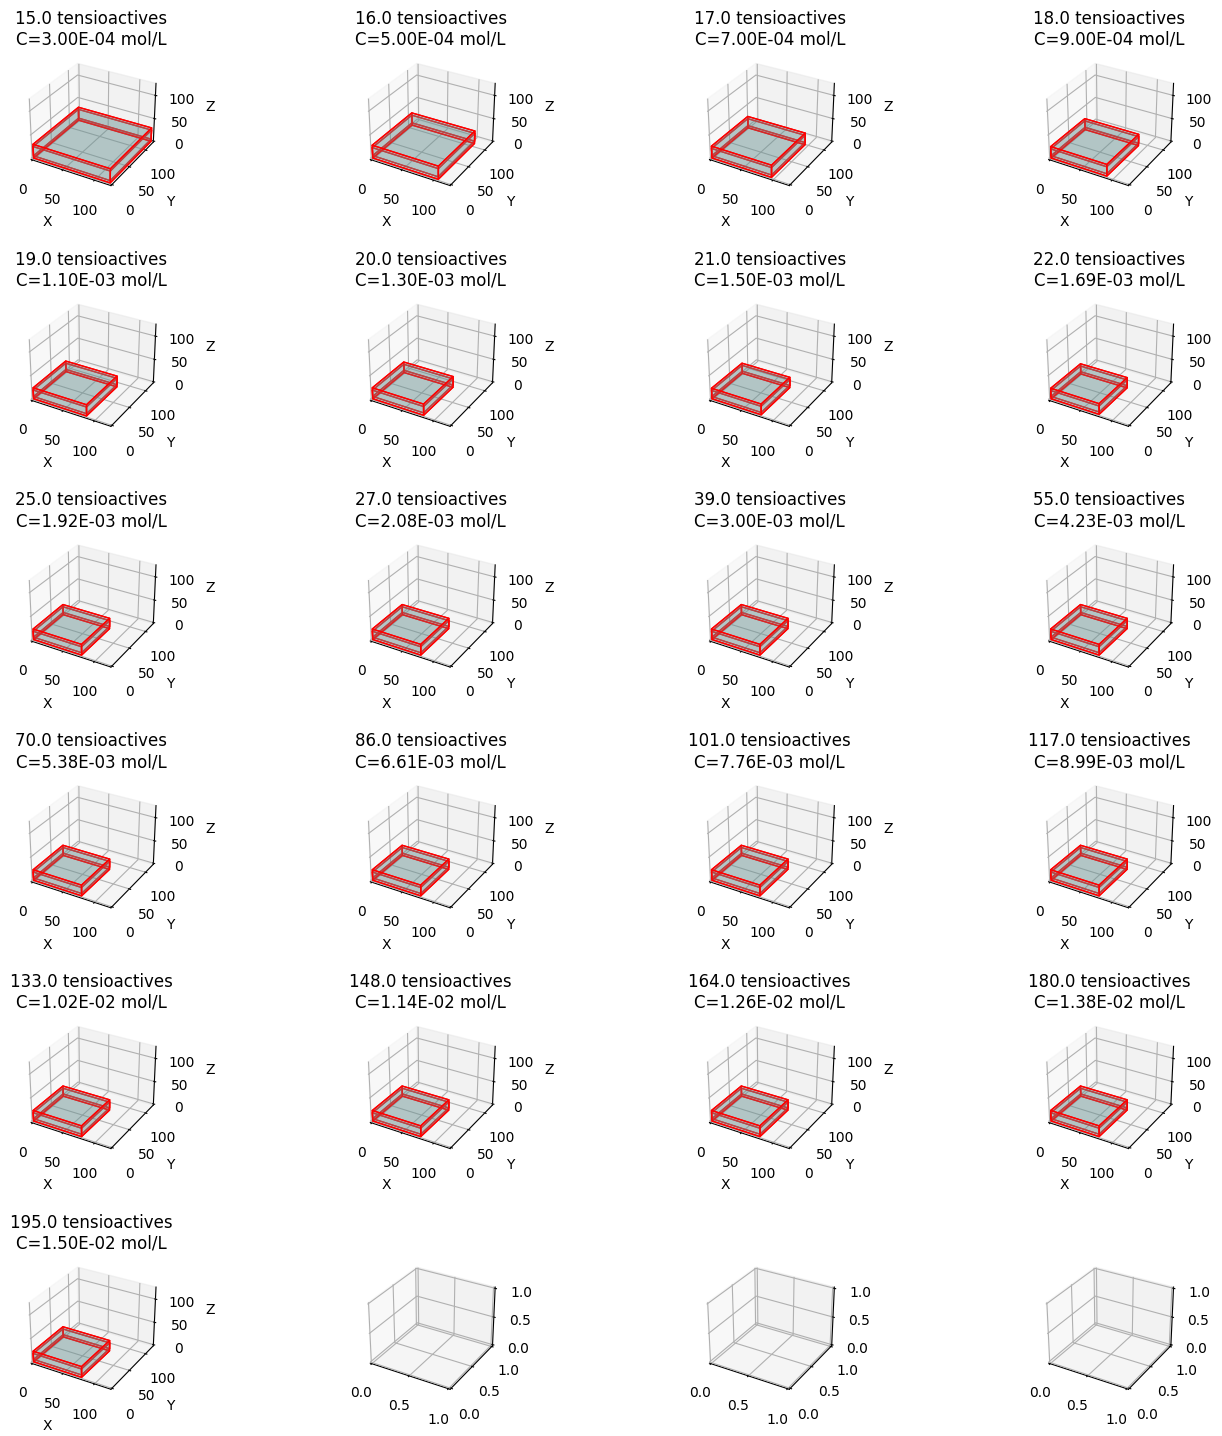

In [3]:
tableCols=["NTensio", "C (mol/L)","Lx","Ly", "Lz", "LxVc", "LyVc", "LzVc", "rootsVc", "topsVc",
 "rootsTot", "topsTot", "wall1z", "wall2z", "Vc", "ratioVcVtot", "membraneSurface", "Vtot", "NBeads"]
table=[]

# Initial variables
Rho = 3           # Number density
Nm = 3            # CG level (#H2O/bead) 
NuH2O = 30e-30    # 30 A^3
Na = 6.02214e23 # Avogadro constant
minWaterWidth = 5 # minimum width of water from either side
minNTensio = 15   # minimum number of tensioactives in the cell
minConcentration = concentrationRange.min()
minVc = 80000     # minimum control volume
minVcWidth = 12   # minimum width of the control volume (z axis)

def calcNTensio(C, Vc):
    NTensio=C*(Na*1e3*Vc*(Rho*Nm*NuH2O))
    return round(NTensio,0)

def calcConcentration(NTensio, Vc):
    C=NTensio/(Na*1e3*Vc*(Rho*Nm*NuH2O))
    return C

def calcVc(C, NTensio):
    Vc=NTensio/(C*(Na*1e3*(Rho*Nm*NuH2O)))
    return Vc

# Iterate for each concentration and create a simulation cell

for C in concentrationRange:
    # Begin by choosing the volume with a minimum condition
    Vc=max(minVc,calcVc(C, minNTensio))

    # increment to never have the same number of tensioactives for two concentrations
    minNTensio+=1 

    # deduce control volume dimensions with a minimum width
    # the ideal control volume shape is LxVc=6*LzVc=LyVc
    LzVc=round(max(minVcWidth,(Vc/36)**(1/3)),6)
    LxVc=round(LzVc*6, 6)
    LyVc=LxVc

    # Update with approximations
    Vc=LxVc * LzVc * LyVc
    NTensio=calcNTensio(C, Vc)

    # Deduce total cell dimensions and coordinates
    Lx=LxVc
    Lz=round(max(LzVc+2*minWaterWidth, 4/3*LzVc), 0)
    Ly=LyVc
    Vtot=Lx*Ly*Lz
    rootsTot=(0,0,0)
    topsTot=(Lx,Ly, Lz)
    # Total number of beads
    NBeads=Vtot*Rho

    # determination of control volume coordinates (middle of the cell)
    spanVcVtot=(Lz-LzVc)/2 
    rootsVc=(0,0,spanVcVtot)
    topsVc=(LxVc, LyVc, LzVc+spanVcVtot)
    
    # Final update of the concentration with obtained volume
    trueConcentration=calcConcentration(NTensio, Vc)

    # Insights about the increase of contact probability 
    ratioVcVtot=Vc/Vtot
    membraneSurface=LxVc*LyVc

    table+=[[NTensio, trueConcentration, Lx,Ly, Lz, LxVc, LyVc, LzVc, rootsVc, topsVc, 
    rootsTot, topsTot, spanVcVtot, LzVc+spanVcVtot, Vc, ratioVcVtot, membraneSurface, Vtot, NBeads]]

# Merge results in a DataFrame and display
dfIni=pd.DataFrame(data=table, columns=tableCols)
display(dfIni)

# Plot all the configurations with the same scale
axisMin=np.min(dfIni["rootsTot"].min())
axisMax=np.max(dfIni["topsTot"].max())

figNb=len(dfIni.index.values)
nCols = 4
nRows=figNb//nCols if figNb%nCols == 0 else figNb//nCols +1 # Add a non complete row
fig, axs = plt.subplots(nRows,nCols, figsize=(15, 15), subplot_kw={'projection': '3d'})
if nRows == 1:
    myRow=None
else:
    myRow=0
myCol=0

myAx = None
for index in dfIni.index.values:
    row = dfIni.loc[index]
    #fig = plt.figure()
    #axs[index] = fig.add_subplot(111, projection='3d')
    if myRow == None:
        myAx = axs[myRow, myCol][0]
    else:
        myAx = axs[myRow, myCol]
    plot_cube(myAx, row["rootsTot"], row["topsTot"], 'cyan', axisMin, axisMax)
    plot_cube(myAx, row["rootsVc"], row["topsVc"], 'red', axisMin, axisMax)
    myAx.set_title(label=f'{row["NTensio"]} tensioactives\nC={row["C (mol/L)"]:.2E} mol/L')

    if myCol < nCols - 1 :
        myCol += 1
    else :
        myRow+=1
        myCol=0
fig.tight_layout(h_pad=4, pad=4)
plt.show()

Create bash commands

In [4]:
# Convert DataFrame to NumPy array
np_array = dfIni[["NTensio","Lx","Ly","Lz","wall1z", "wall2z"]].values

# Convert NumPy array to Bash-compatible format
bash_array = []
lenTensio=5
for row in np_array:
    for i in range(0,3): # 3 runs for better statistics
        tmp="bash posmo.lmp.cpu.sh"
        tmp+=f' {int(row[0])} {i+1} {lenTensio}'
        for element in row[1:]:
            tmp+=" "
            tmp+=str(element) 
        print(tmp)
        bash_array+=[tmp]
print(len(bash_array))

# Write commands in run.bunch.sh
np.savetxt('H1T4-PFOS-K-1/run.bunch.sh', bash_array, fmt='%s', newline='\n')

bash posmo.lmp.cpu.sh 15 1 5 122.650374 122.650374 30.0 4.779135500000001 25.220864499999998
bash posmo.lmp.cpu.sh 15 2 5 122.650374 122.650374 30.0 4.779135500000001 25.220864499999998
bash posmo.lmp.cpu.sh 15 3 5 122.650374 122.650374 30.0 4.779135500000001 25.220864499999998
bash posmo.lmp.cpu.sh 16 1 5 105.696888 105.696888 28.0 5.1919260000000005 22.808073999999998
bash posmo.lmp.cpu.sh 16 2 5 105.696888 105.696888 28.0 5.1919260000000005 22.808073999999998
bash posmo.lmp.cpu.sh 16 3 5 105.696888 105.696888 28.0 5.1919260000000005 22.808073999999998
bash posmo.lmp.cpu.sh 17 1 5 96.411576 96.411576 26.0 4.965702 21.034298
bash posmo.lmp.cpu.sh 17 2 5 96.411576 96.411576 26.0 4.965702 21.034298
bash posmo.lmp.cpu.sh 17 3 5 96.411576 96.411576 26.0 4.965702 21.034298
bash posmo.lmp.cpu.sh 18 1 5 90.36957 90.36957 25.0 4.9692025 20.0307975
bash posmo.lmp.cpu.sh 18 2 5 90.36957 90.36957 25.0 4.9692025 20.0307975
bash posmo.lmp.cpu.sh 18 3 5 90.36957 90.36957 25.0 4.9692025 20.0307975
b